[Download DATASETS from here](https://drive.google.com/drive/folders/1cBv9fiBQE2PedVPvTu56tOMIOtJTjTj1?usp=sharing)

In [378]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
df0 = pd.read_csv('/content/drive/Shareddrives/utshabkg/Dataset/plasma_processed.csv')
df0.head()

,Unnamed: 0,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,2-ketoglucose dimethylacetal NIST,2-ketoisocaproic acid,3-(3-hydroxyphenyl)propionic acid,3-aminoisobutyric acid,3-hydroxybutanoic acid,3-hydroxybutyric acid,3-phosphoglycerate,5-hydroxynorvaline NIST,5-methoxytryptamine,acetoacetate,aconitic acid,adenosine-5-monophosphate,alanine,alloxanoic acid NIST,alpha-ketoglutarate,aminomalonate,arabitol,arachidic acid,arachidonic acid,asparagine,aspartic acid,azelaic acid,behenic acid,benzoic acid,beta-alanine,butane-2_3-diol NIST,butyrolactam NIST,capric acid,caprylic acid,...,pelargonic acid,phenol,phenylalanine,phenylethylamine,phosphate,phosphoethanolamine,pipecolinic acid,piperidone,proline,propane-1_3-diol NIST,pseudo uridine,pyrophosphate,pyrrole-2-carboxylic acid,pyruvic acid,quinic acid,ribose,salicylaldehyde,salicylic acid,serine,shikimic acid,stearic acid,sucrose,tartaric acid,taurine,threitol,threonic acid,threonine,tocopherol alpha-,tocopherol gamma-,trans-4-hydroxyproline,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,1,9483,103,101,963,389,123,20744,139,36,955,79,6387,65,290,1153,2318,62,83,363,418,97,210,190781,153,386,894,36,2294,234,873,664,76,311,1414,697,374,177,219,496,...,3298,1310,12552,95,35856,110,586,84,124169,565,525,2769,416,10789,127,97,160,68,7392,414,85957,82,82,2160,336,778,13505,2429,303,2248,27450,52403,73,255067,10057,63,157332,154,1380,disease
1,2,27468,207,155,335,227,178,8611,78,91,103,73,5609,112,861,384,1624,162,88,65,414,191,148,218774,113,255,1043,324,2258,296,1281,770,102,252,1750,195,274,132,253,479,...,2621,1528,12924,266,42098,44,392,67,113966,669,1178,2406,97,6206,77,187,384,209,5719,453,66836,273,35,1446,192,566,12687,1882,681,2926,17898,37179,157,180080,8386,118,103083,324,929,disease
2,3,13976,86,78,176,152,83,22792,92,97,1010,97,7600,139,331,917,3997,110,161,207,338,118,731,239741,64,363,763,400,2417,682,1203,710,56,311,1740,261,84,82,250,431,...,4059,2058,9682,162,41771,109,419,71,87775,593,598,6129,50,4167,470,116,191,1279,5028,64,119546,137,60,2678,158,871,10976,4433,667,2862,29503,30670,211,138861,15822,119,92045,253,610,disease
3,4,19449,178,104,467,270,157,29418,123,92,289,71,3388,68,2141,465,33679,120,100,87,454,147,311,99474,86,203,1027,223,3927,627,1098,558,74,529,2605,213,238,252,278,813,...,8027,1853,11710,490,38775,93,217,64,65156,869,926,1891,107,2180,63,181,249,87,9764,326,161987,83,77,3198,207,783,12727,2042,447,3036,16501,27573,71,183633,14024,102,97349,223,746,disease
4,5,17209,258,103,979,314,211,16713,76,42,1126,139,6833,679,1098,1487,5414,139,370,202,329,174,313,238858,218,291,2760,366,3156,368,1082,661,35,415,1457,707,227,96,278,442,...,4065,1190,13357,113,55245,132,150,38,60725,534,1109,4951,353,4583,2687,120,204,108,9031,219,94444,91,30,1737,407,283,16981,1980,508,4357,24023,30096,222,255081,23154,58,159671,189,2022,disease


In [379]:
labels = np.reshape(df0.Class.to_numpy(), (82,1))
# labels

# Preprocessing

In [380]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

scl = StandardScaler().fit(df0.iloc[:, :-1])
stand = scl.transform(df0.iloc[:, :-1])
# stand
df = pd.DataFrame(stand, columns = df0.columns[:-1])
df = pd.concat([df, df0.iloc[:, -1]], axis=1)
df

,Unnamed: 0,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,2-ketoglucose dimethylacetal NIST,2-ketoisocaproic acid,3-(3-hydroxyphenyl)propionic acid,3-aminoisobutyric acid,3-hydroxybutanoic acid,3-hydroxybutyric acid,3-phosphoglycerate,5-hydroxynorvaline NIST,5-methoxytryptamine,acetoacetate,aconitic acid,adenosine-5-monophosphate,alanine,alloxanoic acid NIST,alpha-ketoglutarate,aminomalonate,arabitol,arachidic acid,arachidonic acid,asparagine,aspartic acid,azelaic acid,behenic acid,benzoic acid,beta-alanine,butane-2_3-diol NIST,butyrolactam NIST,capric acid,caprylic acid,...,pelargonic acid,phenol,phenylalanine,phenylethylamine,phosphate,phosphoethanolamine,pipecolinic acid,piperidone,proline,propane-1_3-diol NIST,pseudo uridine,pyrophosphate,pyrrole-2-carboxylic acid,pyruvic acid,quinic acid,ribose,salicylaldehyde,salicylic acid,serine,shikimic acid,stearic acid,sucrose,tartaric acid,taurine,threitol,threonic acid,threonine,tocopherol alpha-,tocopherol gamma-,trans-4-hydroxyproline,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,-1.711055,-1.315982,-0.191139,-0.314134,0.900240,0.209300,-0.666017,0.727863,-0.138580,-0.400194,-0.055432,-0.570037,0.314798,-0.515483,-1.090602,1.192538,-0.471110,-0.493834,-0.853596,1.043546,-0.142648,-1.118377,-0.318017,-0.041228,-0.190588,0.512135,-0.915811,-0.940858,-0.247570,-0.687942,-0.384776,0.022548,0.485831,-0.319720,-1.305536,1.909171,0.129464,-0.014736,-0.505966,-0.543644,...,-0.517997,-0.099283,0.226657,-0.969802,-0.916440,0.034358,0.057964,-0.216922,1.817553,-0.839021,-0.830511,-0.273237,0.909815,1.375625,-0.736481,-0.466937,-0.944793,-0.274754,-0.537795,0.474464,-0.484167,-0.527574,-0.109546,0.414720,0.315853,-0.735072,-0.427479,-0.435991,-0.591830,-0.827641,0.523924,1.937765,-0.418593,0.378001,-1.016102,-0.694224,1.877948,-0.534297,0.632746,disease
1,-1.668807,0.702901,-0.166243,1.106687,-0.833770,-0.534704,-0.188475,-0.953771,-0.224592,-0.167457,-1.295085,-0.678532,-0.154647,-0.126854,0.456609,-1.223807,-0.502203,0.922548,-0.821435,-0.680015,-0.156109,1.247929,-0.544047,0.534190,-0.543170,-0.392098,-0.706957,-0.269134,-0.290565,-0.524255,0.947427,0.395145,1.756741,-0.516715,-0.462690,-0.753333,-0.151459,-0.266480,-0.054274,-0.603934,...,-0.786085,0.216627,0.383293,0.075116,-0.207202,-0.830514,-0.115655,-0.290675,1.470738,-0.265920,0.189432,-0.405431,-0.899853,0.290328,-0.798081,0.237910,1.165624,-0.249884,-1.375295,0.656356,-1.108904,0.940075,-0.602185,-0.157190,-0.488633,-0.972326,-0.635903,-0.848173,0.754446,-0.560673,-0.898525,0.312181,-0.180562,-0.527748,-1.243045,0.992711,-0.343225,-0.079396,-0.254870,disease
2,-1.626559,-0.811626,-0.195209,-0.919298,-1.272795,-0.879151,-1.013320,1.011716,-0.204851,-0.142067,0.024593,-0.244554,1.046723,0.096401,-0.979506,0.450981,-0.395886,0.186030,-0.351887,0.141279,-0.411858,-0.589735,1.581370,0.965183,-0.975084,0.353377,-1.099435,-0.091873,-0.100671,0.494828,0.692741,0.184241,-0.491792,-0.319720,-0.487775,-0.403282,-0.685213,-0.546194,-0.094129,-0.774163,...,-0.216647,0.984663,-0.981802,-0.560389,-0.244357,0.021254,-0.091491,-0.273322,0.580465,-0.684724,-0.716490,0.950369,-1.166481,-0.192526,-0.313905,-0.318136,-0.652726,-0.061155,-1.721208,-1.157893,0.613281,-0.104953,-0.340143,0.829635,-0.678581,-0.630994,-1.071862,1.074085,0.704584,-0.585873,0.829649,-0.382834,-0.027542,-1.025622,-0.233142,1.023383,-0.795165,-0.269384,-0.882696,disease
3,-1.584311,-0.197261,-0.173185,-0.235199,-0.469297,-0.337221,-0.370810,1.930079,-0.161140,-0.163225,-1.024456,-0.714697,-1.494799,-0.490677,3.924964,-0.969289,0.933962,0.327668,-0.744249,-0.552772,-0.021504,0.140296,0.050194,-1.918114,-0.781163,-0.751031,-0.729384,-0.504704,1.702726,0.349621,0.349894,-0.350049,0.388069,0.408160,1.682051,-0.657864,-0.252591,0.404836,0.277852,0.580579,...,1.35

# Student's   t-Test

In [381]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()
y = y.map({"control": 1, "disease": 0})

X.shape, y.shape

((82, 159), (82,))

In [382]:
disease = df[(df['Class']=='disease')]
control = df[(df['Class']=='control')]

In [383]:
from scipy import stats

Before the t-test can be conducted, one needs to test the assumptions. First to test for the homogeneity of variances. To do this, I will use Levene’s test for homogeneity of variance. 

In [384]:
stats.levene(disease['1_5-anhydroglucitol'], control['1_5-anhydroglucitol'])

LeveneResult(statistic=0.9232842255878864, pvalue=0.33950937635055467)

The test is not significant meaning there is homogeneity of variances and we can proceed. If the test were to be significant, a viable alternative would be to conduct a Welch’s t-test. Next to test the assumption of normality. This can be done visually with a histogram and/or as a q-q plot, and by using the Shapiro-Wilk test which is the stats.shaprio() method. First, I will check them visually.

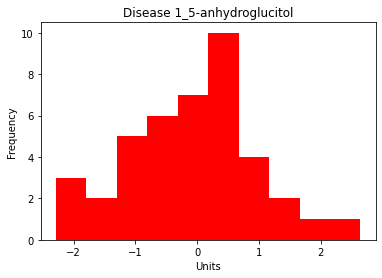

In [385]:
disease['1_5-anhydroglucitol'].plot(kind="hist", title="Disease 1_5-anhydroglucitol", color='red')
plt.xlabel("Units")
plt.savefig('disease_1_5-anhydroglucitol')

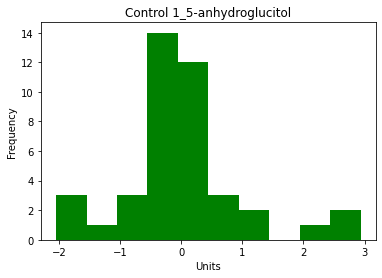

In [386]:
control['1_5-anhydroglucitol'].plot(kind='hist', title='Control 1_5-anhydroglucitol', color='green')
plt.xlabel("Units")
plt.savefig('control_1_5-anhydroglucitol')

From the looks of the histogram, each variable appears to be fairly normally distributed. Let’s see how it looks on a q-q plot, it’s easier to get a sense of normality visualizing the data as q-q plot. If you are unfamiliar with reading a q-q plot, the data should be on the red line. If there are data points that are far off of it, it’s an indication that there are some deviations from normality.

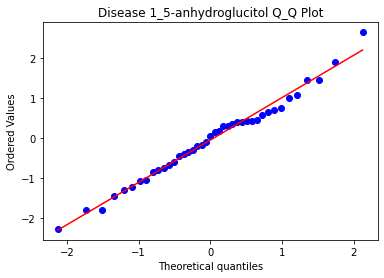

In [387]:
stats.probplot(disease['1_5-anhydroglucitol'], dist='norm', plot=plt)
plt.title('Disease 1_5-anhydroglucitol Q_Q Plot')
plt.savefig('disease_1_5-anhydroglucitol_qqplot')

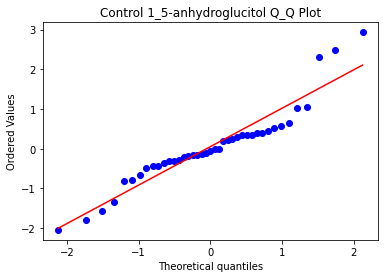

In [388]:
stats.probplot(control['1_5-anhydroglucitol'], dist='norm', plot=plt)
plt.title('Control 1_5-anhydroglucitol Q_Q Plot')
plt.savefig('control_1_5-anhydroglucitol_qqplot')

There is some deviation from normality in the Control q-q plot, but it does not appear to be a large violation. In all, the data looks to have normality. To be sure, we can test it statistically using the Shapiro-Wilk test for normality. The first value is the W test statistic and the second value is the p-value.

In [389]:
stats.shapiro(disease['1_5-anhydroglucitol'])

(0.9895635843276978, 0.9660769701004028)

In [390]:
stats.shapiro(control['1_5-anhydroglucitol'])

(0.9127679467201233, 0.0040376451797783375)

Neither of the tests for normality we significant meaning neither of the variables violates the assumption of normality. We can continue as planned(Independent t-test).

In [391]:
stats.ttest_ind(disease['1_5-anhydroglucitol'], control['1_5-anhydroglucitol'])

Ttest_indResult(statistic=-0.46223621312996305, pvalue=0.6451666190665317)

In [392]:
def test(feature):
    l_test = stats.levene(disease[feature], control[feature])
    disease_shapiro = stats.shapiro(disease[feature])
    control_shapiro = stats.shapiro(control[feature])
    t_test, t_test_p = stats.ttest_ind(disease[feature], control[feature])
    k_test, k_test_p = stats.kruskal(disease[feature], control[feature])
    return feature, l_test, disease_shapiro, control_shapiro, t_test, t_test_p, k_test, k_test_p

In [393]:
df.columns[0]

'Unnamed: 0'

In [394]:
result = []
for i in range(1, 159):
    result.append(test(df.columns[i]))

In [395]:
result_df = pd.DataFrame(result, columns=['Metabolics', 'Levene test', 'Disease', 'Control', 't-Test', 'p-value(t)', 'Kruskal-Wallis', 'p-value(k)'])
result_df.to_csv('test.csv')
result_df

,Metabolics,Levene test,Disease,Control,t-Test,p-value(t),Kruskal-Wallis,p-value(k)
0,1_5-anhydroglucitol,"(0.9232842255878864, 0.33950937635055467)","(0.9895635843276978, 0.9660769701004028)","(0.9127679467201233, 0.0040376451797783375)",-0.462236,0.645167,0.032704,0.856491
1,1-monostearin,"(2.614251637045106, 0.10984420325840032)","(0.287780225276947, 7.504350331248577e-13)","(0.9605392813682556, 0.1642741858959198)",1.607087,0.111975,0.246231,0.619742
2,2_3-dihydroxybutanoic acid NIST,"(0.006478335067887287, 0.9360500705169275)","(0.937421977519989, 0.02565603516995907)","(0.9520213007926941, 0.08242102712392807)",0.687948,0.493476,0.182043,0.669623
3,2_4-diaminobutyric acid,"(0.09694042032074676, 0.7563425132995316)","(0.9051264524459839, 0.002357517834752798)","(0.9194269776344299, 0.006540666334331036)",0.683553,0.496233,0.458353,0.498395
4,2-deoxyerythritol,"(0.9084069671879833, 0.343408402153335)","(0.8347311615943909, 3.2259136787615716e-05)","(0.9222153425216675, 0.008035030215978622)",0.540504,0.590351,0.005505,0.940855
...,...,...,...,...,...,...,...,...
153,uric acid,"(0.13186210687409833, 0.7174668378397271)","(0.9512421488761902, 0.0773795023560524)","(0.9740688800811768, 0.4632870554924011)",-2.925388,0.004475,8.345484,0.003866
154,uridine,"(0.03291118965337513, 0.8565011579184116)","(0.9404267072677612, 0.03250748664140701)","(0.9610065221786499, 0.170563742518425)",-0.013382,0.989356,0.001377,0.970404
155,valine,"(0.35458054850656984, 0.5532124135196688)","(0.9560146331787109, 0.11394292861223221)","(0.9369757175445557, 0.024774545803666115)",-0.845800,0.400187,1.167313,0.279954
156,xylitol,"(0.3129396598445397, 0.57744470642991)","(0.5075222253799438, 1.5187914814696057e-10)","(0.5687038898468018, 8.869149303869506e-10)",-0.609977,0.543606,0.210767,0.646167


In [396]:
metabolics = result_df[(result_df['p-value(t)'] < 0.01) | (result_df['p-value(k)'] < 0.01)].loc[:, 'Metabolics']
metabolics = metabolics.to_numpy()
metabolics

array(['3-phosphoglycerate', '5-hydroxynorvaline NIST',
       '5-methoxytryptamine', 'adenosine-5-monophosphate',
       'alpha-ketoglutarate', 'asparagine', 'aspartic acid',
       'benzoic acid', 'citrulline', 'glutamine', 'hypoxanthine',
       'inosine', 'lactamide', 'lactic acid', 'malic acid', 'maltose',
       'maltotriose', 'methionine sulfoxide', 'N-methylalanine',
       'nornicotine', 'phenol', 'phosphoethanolamine', 'pyrophosphate',
       'pyruvic acid', 'quinic acid', 'taurine', 'threonine',
       'tryptophan', 'uric acid'], dtype=object)

Now we keep the data of these metabolics only, from main dataset.

In [397]:
final_df = df.loc[:, metabolics]
final_df = pd.concat([final_df, df.loc[:, 'Class']], axis=1)
final_df

,3-phosphoglycerate,5-hydroxynorvaline NIST,5-methoxytryptamine,adenosine-5-monophosphate,alpha-ketoglutarate,asparagine,aspartic acid,benzoic acid,citrulline,glutamine,hypoxanthine,inosine,lactamide,lactic acid,malic acid,maltose,maltotriose,methionine sulfoxide,N-methylalanine,nornicotine,phenol,phosphoethanolamine,pyrophosphate,pyruvic acid,quinic acid,taurine,threonine,tryptophan,uric acid,Class
0,-0.493834,-0.853596,1.043546,-0.318017,0.512135,-0.384776,0.022548,-1.305536,-0.326638,-0.190839,0.415434,-0.214941,-0.445169,-0.042836,0.756656,-0.338804,-1.207098,0.191187,-0.095912,-0.819328,-0.099283,0.034358,-0.273237,1.375625,-0.736481,0.414720,-0.427479,0.523924,-1.016102,disease
1,0.922548,-0.821435,-0.680015,-0.544047,-0.392098,0.947427,0.395145,-0.462690,0.687196,1.044991,1.371994,-0.241071,-0.497393,0.154308,0.094793,-0.294908,-0.127933,-0.468097,-1.188920,-0.789410,0.216627,-0.830514,-0.405431,0.290328,-0.798081,-0.157190,-0.635903,-0.898525,-1.243045,disease
2,0.186030,-0.351887,0.141279,1.581370,0.353377,0.692741,0.184241,-0.487775,-0.563638,0.355438,-0.305743,-0.234539,-0.143616,1.064361,0.064009,0.235490,0.675167,-0.711349,-0.710083,-0.352600,0.984663,0.021254,0.950369,-0.192526,-0.313905,0.829635,-1.071862,0.829649,-0.233142,disease
3,0.327668,-0.744249,-0.552772,0.050194,-0.751031,0.349894,-0.350049,1.682051,-0.994847,1.152050,1.912876,-0.005895,-0.413161,0.526588,-0.413148,-0.192487,-0.378901,-0.654514,1.832288,-0.717605,0.687592,-0.188412,-0.592977,-0.663066,-0.815329,1.246152,-0.625712,-1.106561,-0.477333,disease
4,0.596780,0.992437,0.112360,0.057486,-0.143607,0.297651,0.012003,-1.197672,0.766196,-0.305898,0.245156,-0.312931,-0.496551,-0.325137,0.756656,-0.009591,1.428073,0.120711,0.911157,1.412589,-0.273178,0.322649,0.521378,-0.094013,2.417442,0.075899,0.458198,0.013588,0.762636,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-0.890421,-0.287565,-0.784123,-0.795598,-0.295463,0.771106,-0.821068,-0.628249,0.078237,1.063280,-0.656314,0.013703,-0.503289,-0.722605,-0.967265,-0.353435,-0.378901,0.327590,0.753645,-0.292763,-0.678933,-0.450494,-0.956782,-0.116747,-0.184545,-0.373459,0.186074,0.980799,0.046360,control
78,0.355996,-0.197515,0.095009,-0.412804,-0.640590,-0.427224,-0.733191,-1.057197,-0.408930,-0.134892,5.193226,-0.136549,-0.438430,0.644590,-0.674814,-0.188829,-0.604773,-0.365794,0.508431,-0.208991,0.791929,-0.424286,-0.221161,-0.514587,-0.732785,-0.233285,0.678852,-0.029896,1.559041,control
79,-0.465506,-0.081736,-0.749420,-0.810180,0.781335,-0.103969,-0.522287,1.496424,0.914321,1.465637,-0.666331,0.105160,-0.523505,-0.532977,1.218420,-0.349777,0.047745,0.384425,-0.944209,-0.101285,-0.444175,-0.240828,-0.666904,-0.357819,0.226944,-0.544071,-1.008418,0.944910,0.298428,control
80,-0.777110,-0.795707,-0.506502,-0.722685,-0.136704,-1.220668,-0.673435,0.896900,-1.169305,-1.386388,-0.440963,-0.208408,0.640588,-0.460003,-0.089913,-0.499752,-0.830645,0.382151,0.695933,-0.765475,-0.180434,-0.437390,-0.918180,-0.103486,-0.820257,-1.054304,1.107677,-1.340508,-0.008101,control


# Heatmap

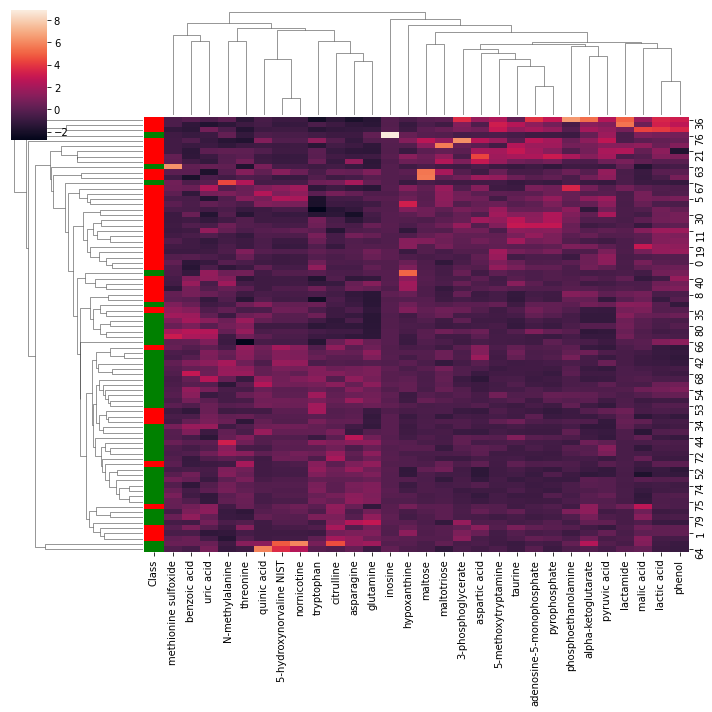

In [398]:
# Data set
import seaborn as sns
Class = final_df.pop("Class")
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "rgb"))
row_colors = Class.map(lut)
# Default plot
sns.clustermap(final_df, row_colors=row_colors, z_score=1)      #z_score->normalize, standard_cale->standardize

# Show the graph
plt.show()